# Wetalk 13: Stock Price Forecasting Using CNN-LSTM
## GDSC UIN SUNAN Kalijaga
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1MhaJ5iiROYH5scUy2rhRSR-_p7mLhjst?usp=sharing)

# Introduction to Time Series

## Pengertian

Deret waktu didefinisikan sebagai kumpulan observasi atau amatan yang dibuat secara beruntun (sequentially) atau berurut sepanjang waktu. Biasanya observasi dalam deret waktu tidaklah bebas atau bisa dikatakan berkorelasi. Dengan demikian, urutan dari observasi menjadi penting. <a href="https://simdos.unud.ac.id/uploads/file_pendidikan_1_dir/5fd0d25a09bf992287897e4920c6c831.pdf">(Sumarjaya 2016)</a>

## Contoh



1.   Saham 

![teks link](https://images.unsplash.com/photo-1591696205602-2f950c417cb9?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=600&q=80)


2.   Cuaca

![](https://cdn.idntimes.com/content-images/community/2022/03/temp-weather-thumbnail-6cd8625b15ee7890417b07429c637009_600x400.png)

3.   Penjualan

![](http://www.dataindustri.com/wp-content/uploads/2016/12/DPMH.png)

4.   Suara

![](https://www.researchgate.net/profile/Achmad-Rizal-4/publication/266054051/figure/fig1/AS:669435895492619@1536617363345/Gambar-1-Spektrum-frekuensi-a-suara-paruparu-bsuara-jantung-crekaman-suara.png)

5.   Mobilitas

![](https://cdn1.katadata.co.id/media/chart_thumbnail/123711-mobilitas-masyarakat-mulai-pulih-per-september-2021.png?v=1644287111)



## Manfaat Time Series

In [1]:
from IPython.display import HTML

HTML(
  ''' 
  <iframe width="560" height="315" src="https://www.youtube.com/embed/75ZBcU7s8As?start=282" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
  '''
)

1.   Manfaat analisis data berkala adalah untuk peramalan kondisi masa mendatang
berdasarkan data yang sebelumnya
2.    Analisis data berkala memungkinkan kita untuk mengetahui perkembangan suatu kejadian serta pengaruhnya atau hubungannya terhadap kejadian lain. Contoh: apakah kenaikan biaya iklan akan diikuti dengan pendekatan penerimaan penjualan
3.    Peramalan kondisi mendatang bermanfaat untuk perencanaan produksi, pemasaran, keuangan, dan bidang lainnya

## Komponen Time Series

In [2]:
from IPython.display import HTML

HTML(
  ''' 
  <iframe width="560" height="315" src="https://www.youtube.com/embed/75ZBcU7s8As?start=344" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
  '''
)

1.   Tren adalah suatu gerakan yang menunjukan arah perkembangan atau kecenderungan secara umum dari data berkala yang menunjukkan jangka waktu yang panjang. Atau suatu garis halus atau kurva yang menunjukkan suatu kecenderungan umum dari suatu data berkala
2.   Variasi musim adalah suatu gerakan yang naik turun secara teratur yang cenderung untuk terulang kembali dalam jangka waktu tidak lebih dari 1 tahun
3.   Variasi siklis adalah suatu gerakan yang naik turun secara teratur yang cenderung untuk terulang kembali setelah jangka waktu lebih dari 1 tahun
4.   Variasi random adalah suatu gerakan yang naik-turun secara tiba-tiba atau mempunyai sifat yang sporadis atau pola tidak teratur sehingga biasanya sulit untuk diperkirakan sebelumnya


# CNN-LSTM

CNN-LSTM adalah algoritma deep learning yang menggunakan lapisan konvolusi untuk mengotomatisasi ekstraksi data dan lapisan LSTM untuk mempelajari pola pada data sekuensial. Dari penjelasan tersebut, CNN-LSTM memungkinkan untuk digunakan sebagai model time series.




---
Sebagian kutipan di sini diambil dari paper saya dengan dosen.
*   <a href="https://www.researchgate.net/publication/357673493_Jakarta_Composite_Index_Model_Before_and_During_COVID-19_Using_CNN-LSTM">Paper</a>
*   <a href="https://colab.research.google.com/drive/1UpjHRnSSgluapA6vIZNs1xdCVO7OwsM6?usp=sharing">Kode asli</a>

## Kelebihan CNN-LSTM



*   Memiliki kemampuan untuk mengekstrak fitur secara otomatis
*   Dapat mempelajari pola dalam data sekuensial tanpa mengabaikan urutannya
*   Robust terhadap noise
*   Model tidak terpaku pada model linier

## CNN

CNN, yang dicetuskan oleh Lecun et al., (1998), mulanya digunakan untuk mengotomatisasi ekstraksi fitur pada data citra. Umumnya CNN terdiri dari lapisan konvolusi dan lapisan pooling. Lapisan konvolusi pada CNN terdiri dari beberapa kernel konvolusi dengan ukuran tertentu. Cara kerjanya adalah dengan melakukan perkalian dot pada sub data. Kernel kemudian digeser sebanyak n langkah untuk dikenakan pada sub data lainnya. Output pada lapisan konvolusi kemudian dikenakan fungsi aktivasi. 



Gambar di bawah mengilustrasikan bagaimana jika data dengan dimensi 1x4 yang dikenakan kernel konvolusi 1 dimensi dengan panjang kernel sebesar 2 dan panjang langkah sebesar 1.

![](https://www.researchgate.net/profile/Yogi-Anggara/publication/357673493/figure/fig1/AS:1109954102595586@1641645088743/How-a-1-dimensional-convolution-kernel-with-a-kernel-length-of-2-and-a-step-length-of-1_W250.jpg)

---

Lebih jauh soal CNN:

*   Medium - Samuel Sena: <a href="https://medium.com/@samuelsena/pengenalan-deep-learning-part-7-convolutional-neural-network-cnn-b003b477dc94">Pengenalan Deep Learning Part 7 : Convolutional Neural Network (CNN)</a>



## LSTM

LSTM, yang dicetuskan oleh  Hochreiter & Schmidhuber (1997), adalah bentuk modifikasi dari jaringan syaraf berulang. LSTM didesain untuk dapat mengatasi masalah vanishing gradient yang terjadi pada pelatihan jaringan syaraf berulang (Ta et al., 2020). Berbeda dengan jaringan syaraf berulang, pada LSTM terdapat forget gate, input gate, dan output gate.








Cara kerja RNN / LSTM:

![](https://www.researchgate.net/publication/346468428/figure/fig2/AS:1002447011074049@1616013400756/Illustration-of-the-recurrent-neural-network-RNN-structure_W640.jpg)

Arsitektur RNN

![](https://indoml.files.wordpress.com/2018/04/rnn-network.png)

Arsitektur LSTM

![](https://indoml.files.wordpress.com/2018/04/lstm-network2.png)


---

Lebih jauh soal RNN dan LSTM:

*   Menara Ilmu Machine learning UGM: <a href="https://machinelearning.mipa.ugm.ac.id/2018/07/01/recurrent-neural-network-rnn/">Recurrent Neural Network (RNN)</a>
*   Tau Data: <a href="https://tau-data.id/lstm/">Pengenalan Long Short-Term Memory (LSTM)</a>
*   IndoML: <a href="https://indoml.com/2018/04/04/pengenalan-rnn-bag-1/">Pengenalan Recurrent Neural Network (RNN) – Bagian 1</a>
*   IndoML: <a href="https://indoml.com/2018/04/13/pengenalan-long-short-term-memory-lstm-dan-gated-recurrent-unit-gru-rnn-bagian-2/">Pengenalan Long Short Term Memory (LSTM) dan Gated Recurrent Unit (GRU) – RNN Bagian 2</a>

# Praktik
# Peramalan Data IHSG dengan CNN-LSTM

In [180]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

## Import Data

In [17]:
url = 'https://query1.finance.yahoo.com/v7/finance/download/%5EJKSE?period1=1585699200&period2=1617235200&interval=1d&events=history&includeAdjustedClose=true'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date']).asfreq('D').fillna(method='ffill')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,4538.930176,4627.417969,4445.138184,4466.037109,4466.037109,41848000.0
2020-04-02,4466.037109,4531.685059,4393.668945,4531.685059,4531.685059,46011500.0
2020-04-03,4531.685059,4623.429199,4531.685059,4623.429199,4623.429199,58684300.0
2020-04-04,4531.685059,4623.429199,4531.685059,4623.429199,4623.429199,58684300.0
2020-04-05,4531.685059,4623.429199,4531.685059,4623.429199,4623.429199,58684300.0


In [181]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-27,6141.605957,6195.562012,6106.078125,6195.562012,6195.562012,124284100.0
2021-03-28,6141.605957,6195.562012,6106.078125,6195.562012,6195.562012,124284100.0
2021-03-29,6205.568848,6230.990234,6165.553223,6166.817871,6166.817871,114609800.0
2021-03-30,6163.721191,6170.668945,6046.467773,6071.441895,6071.441895,118686600.0
2021-03-31,6062.950195,6066.836914,5892.645020,5985.521973,5985.521973,123071400.0


## Eksplorasi Data

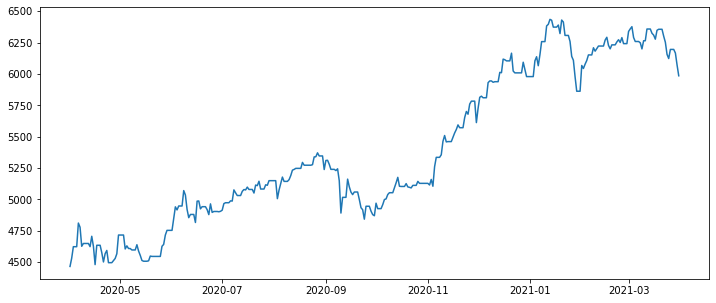

In [182]:
ts = df['Close']
plt.figure(figsize=(12,5))
plt.plot(ts)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


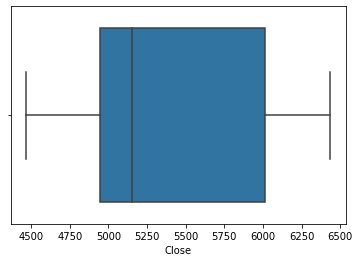

In [183]:
sns.boxplot(ts)

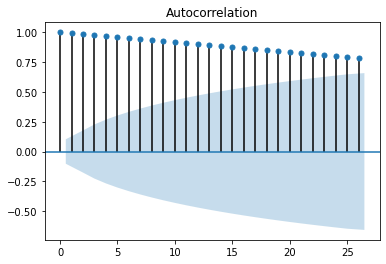

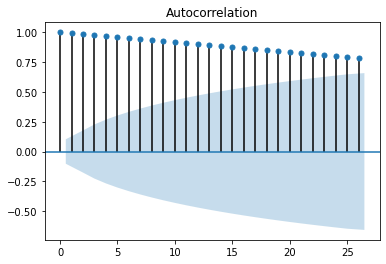

In [184]:
plot_acf(ts)

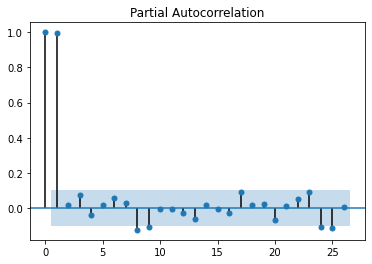

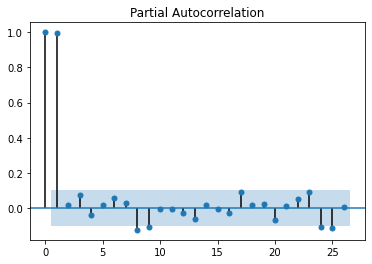

In [185]:
plot_pacf(ts)

## Split Data

In [186]:
def train_test_split_sequence(ts, prop_train=.8):
  split_point = round(prop_train * len(ts))
  train, test = ts[:split_point+1], ts[split_point+1:]
  return train, test

def input_output_split_sequence(seq, n_steps):
  X, y = [], []
  for i in range(len(seq)):
    end_ix = i + n_steps
    if end_ix > len(seq) - 1:
      break
    seq_x, seq_y = seq[i:end_ix], seq[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [187]:
train, test = train_test_split_sequence(ts)

output = f'''
Train: 
{train}

Text:
{test}
'''
print(output)


Train: 
Date
2020-04-01    4466.037109
2020-04-02    4531.685059
2020-04-03    4623.429199
2020-04-04    4623.429199
2020-04-05    4623.429199
                 ...     
2021-01-14    6428.314941
2021-01-15    6373.412109
2021-01-16    6373.412109
2021-01-17    6373.412109
2021-01-18    6389.833984
Freq: D, Name: Close, Length: 293, dtype: float64

Text:
Date
2021-01-19    6321.855957
2021-01-20    6429.757813
2021-01-21    6413.892090
2021-01-22    6307.126953
2021-01-23    6307.126953
                 ...     
2021-03-27    6195.562012
2021-03-28    6195.562012
2021-03-29    6166.817871
2021-03-30    6071.441895
2021-03-31    5985.521973
Freq: D, Name: Close, Length: 72, dtype: float64



In [188]:
X_train, y_train = input_output_split_sequence(train, n_steps=7)
X_test, y_test = input_output_split_sequence(test, n_steps=7)

output = f'''
X train ({X_train.shape}): 
{X_train}

y train ({y_train.shape}):
{y_train}
'''
print(output)


X train ((286, 7)): 
[[4466.037109 4531.685059 4623.429199 ... 4623.429199 4811.827148
  4778.63916 ]
 [4531.685059 4623.429199 4623.429199 ... 4811.827148 4778.63916
  4626.694824]
 [4623.429199 4623.429199 4623.429199 ... 4778.63916  4626.694824
  4649.079102]
 ...
 [6257.834961 6257.834961 6382.937012 ... 6435.205078 6428.314941
  6373.412109]
 [6257.834961 6382.937012 6395.668945 ... 6428.314941 6373.412109
  6373.412109]
 [6382.937012 6395.668945 6435.205078 ... 6373.412109 6373.412109
  6373.412109]]

y train ((286,)):
[4626.694824 4649.079102 4649.079102 4649.079102 4649.079102 4623.894043
 4706.491211 4625.904785 4480.606934 4634.820801 4634.820801 4634.820801
 4575.904785 4501.918945 4567.562012 4593.554199 4496.063965 4496.063965
 4496.063965 4513.141113 4529.554199 4567.323242 4716.402832 4716.402832
 4716.402832 4716.402832 4605.486816 4630.132813 4608.790039 4608.790039
 4597.430176 4597.430176 4597.430176 4639.10498  4588.733887 4554.358887
 4513.833984 4507.606934 4507.

## Latih Model

In [189]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Reshape
from keras.layers.convolutional import Conv1D
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [191]:
from pandas.core.common import flatten
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(LSTM(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001))

model.build(input_shape=(None, 7, 1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 6, 64)             192       
                                                                 
 lstm_6 (LSTM)               (None, 64)                33024     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 37,441
Trainable params: 37,441
Non-trainable params: 0
_________________________________________________________________


In [192]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))

Epoch 1/150
9/9 [==============================] - 3s 46ms/step - loss: 26294712.0000 - val_loss: 31621916.0000
Epoch 2/150
9/9 [==============================] - 0s 12ms/step - loss: 17508054.0000 - val_loss: 14513292.0000
Epoch 3/150
9/9 [==============================] - 0s 11ms/step - loss: 4896282.5000 - val_loss: 170887.1250
Epoch 4/150
9/9 [==============================] - 0s 12ms/step - loss: 801327.1875 - val_loss: 2311555.0000
Epoch 5/150
9/9 [==============================] - 0s 11ms/step - loss: 612865.0000 - val_loss: 26605.1133
Epoch 6/150
9/9 [==============================] - 0s 13ms/step - loss: 197517.1406 - val_loss: 298534.0938
Epoch 7/150
9/9 [==============================] - 0s 15ms/step - loss: 95245.5469 - val_loss: 31590.6875
Epoch 8/150
9/9 [==============================] - 0s 13ms/step - loss: 39916.2148 - val_loss: 70573.0625
Epoch 9/150
9/9 [==============================] - 0s 11ms/step - loss: 15267.9043 - val_loss: 15100.2754
Epoch 10/150
9/9 [=======

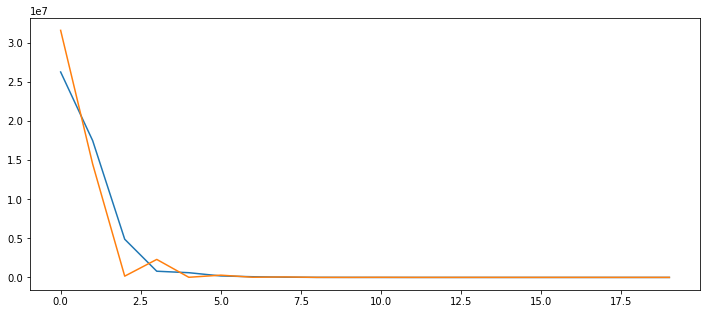

In [195]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'][:20])
plt.plot(history.history['val_loss'][:20])

In [196]:
def metrics_evaluation_regression(test, predict):
  metrics = pd.DataFrame({
      'MSE': [mean_squared_error(test, predict)],
      'RMSE': [np.sqrt(mean_squared_error(test, predict))],
      'MAE': [mean_absolute_error(test, predict)],
      'MAPE': [mean_absolute_percentage_error(test, predict)]
  })
  return metrics 

In [197]:
metrics_evaluation_regression(y_train, model.predict(X_train))

,MSE,RMSE,MAE,MAPE
0,6068.275428,77.899136,59.861381,0.011646


In [198]:
metrics_evaluation_regression(y_test, model.predict(X_test))

,MSE,RMSE,MAE,MAPE
0,15505.165076,124.519738,88.04221,0.014388


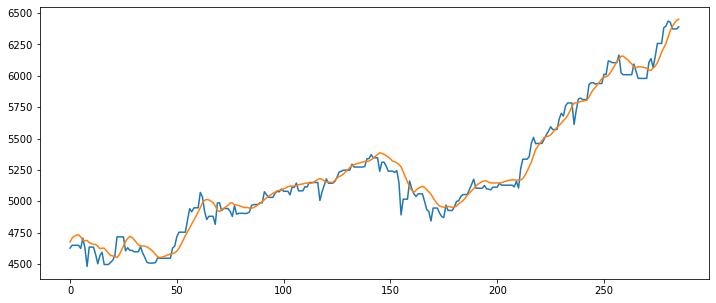

In [199]:
plt.figure(figsize=(12,5))
plt.plot(y_train)
plt.plot(model.predict(X_train))

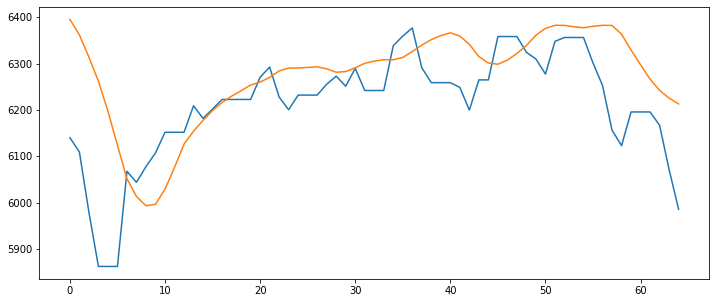

In [200]:
plt.figure(figsize=(12,5))
plt.plot(y_test)
plt.plot(model.predict(X_test))

In [201]:
url2 = 'https://query1.finance.yahoo.com/v7/finance/download/%5EJKSE?period1=1617235200&period2=1625011200&interval=1d&events=history&includeAdjustedClose=true'
df2 = pd.read_csv(url2)
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.set_index(['Date']).asfreq('D').fillna(method='ffill')
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,5988.022949,6020.164063,5960.816895,6011.456055,6011.456055,106367400.0
2021-04-02,5988.022949,6020.164063,5960.816895,6011.456055,6011.456055,106367400.0
2021-04-03,5988.022949,6020.164063,5960.816895,6011.456055,6011.456055,106367400.0
2021-04-04,5988.022949,6020.164063,5960.816895,6011.456055,6011.456055,106367400.0
2021-04-05,6040.055176,6051.621094,5964.483887,5970.286133,5970.286133,122053600.0


In [202]:
df2.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-25,6027.220215,6067.791016,6019.404785,6022.398926,6022.398926,172441600.0
2021-06-26,6027.220215,6067.791016,6019.404785,6022.398926,6022.398926,172441600.0
2021-06-27,6027.220215,6067.791016,6019.404785,6022.398926,6022.398926,172441600.0
2021-06-28,6015.278809,6030.890137,5939.471191,5939.471191,5939.471191,145849200.0
2021-06-29,5944.242188,5992.863770,5913.590820,5949.049805,5949.049805,188801800.0


In [203]:
ts2 = df2['Close']

X_ts2, y_ts2 = input_output_split_sequence(ts2, n_steps=7)
metrics_evaluation_regression(y_ts2, model.predict(X_ts2))

,MSE,RMSE,MAE,MAPE
0,6265.383955,79.154178,64.172293,0.010782


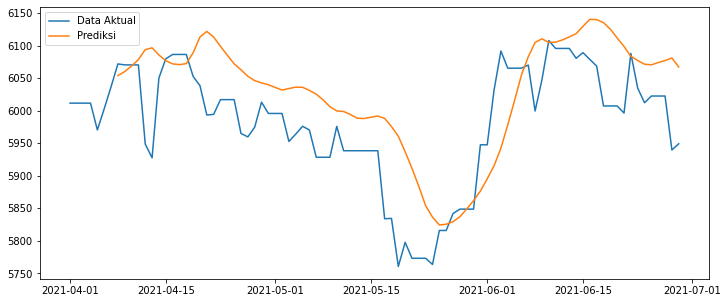

In [205]:
plt.figure(figsize=(12,5))
plt.plot(ts2)
plt.plot(pd.Series(model.predict(X_ts2).reshape(-1), index=ts2.index[len(ts2) - len(y_ts2):]))
plt.legend(['Data Aktual', 'Prediksi'])

## Hyperparameter Tuning

In [150]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 5.2 MB/s 


In [206]:
import keras_tuner as kt

In [207]:
def model_builder(hp):
  n_steps, n_features = 7, 1
  model = Sequential()

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_filter = hp.Int('units_filter', min_value=8, max_value=512, step=32)
  hp_units_lstm = hp.Int('units_lstm', min_value=8, max_value=512, step=32)
  hp_units_dense = hp.Int('units_dense', min_value=8, max_value=512, step=32)
  model.add(Reshape((n_steps, n_features), input_dim=n_steps))
  model.add(Conv1D(filters=hp_filter, kernel_size=2, activation='relu'))
  model.add(LSTM(hp_units_lstm, activation='relu'))
  model.add(Dense(hp_units_dense, activation='relu'))
  model.add(Dense(1))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='mse')

  return model

In [208]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [209]:
n_steps, n_features = 7, 1
X, y = input_output_split_sequence(ts, n_steps)

tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='cnn-lstm_model',
                     project_name='during_covid',
                    # # FOR TRAIN ONLY
                    #  overwrite=True
                    # # --------------
                     )

tuner.search(X, y, epochs=50, callbacks=[stop_early], validation_split=0.2,)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

tuning = ['units_filter', 'units_lstm', 'units_dense', 'learning_rate']
print('Best tune:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune:
units_filter: 72
units_lstm: 296
units_dense: 296
learning_rate: 0.01


Best epoch: 99, loss: 8827.109, val loss: 15048.301


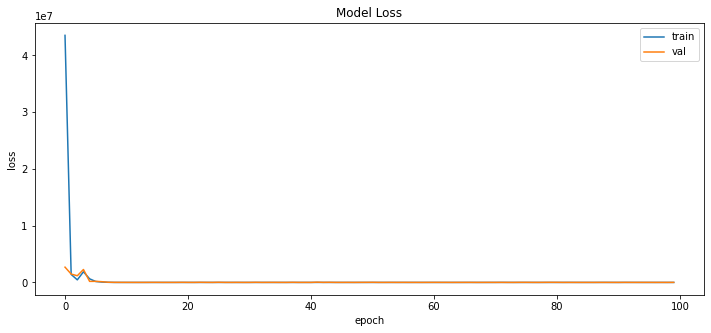

In [210]:
checkpoint_filepath = 'cnn-lstm_model/during_covid_model_best_weight.h5'
history_filepath = 'cnn-lstm_model/during_covid_model_hist.csv'

# # FOR TRAIN ONLY
# model_checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_best_only=True, 
#     monitor='val_loss', 
#     mode='min')
# # ---------------

model_during_covid = tuner.hypermodel.build(best_hps)

# # FOR TRAIN ONLY
# history = model_during_covid.fit(X_train, y_train, epochs=100, callbacks=[model_checkpoint_callback], validation_data=(X_test, y_test), verbose=0)
# # ---------------

model_during_covid.load_weights(checkpoint_filepath)

# # FOR TRAIN ONLY
# model_during_covid.compile(optimizer='adam', loss='mse')
# hist_df = pd.DataFrame(history.history)
# with open(history_filepath, mode='w') as f:
#     hist_df.to_csv(f, index=False)
# # ---------------

history = pd.read_csv(history_filepath)
loss_per_epoch = history['loss']
val_loss_per_epoch = history['val_loss']
best_epoch = val_loss_per_epoch[val_loss_per_epoch == val_loss_per_epoch.min()].index[0] + 1
print('Best epoch: %d, loss: %.3f, val loss: %.3f' % (best_epoch, loss_per_epoch[best_epoch-1], val_loss_per_epoch[best_epoch-1]))

plt.figure(figsize=(12,5))
plt.plot(loss_per_epoch)
plt.plot(val_loss_per_epoch)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [211]:
metrics_evaluation_regression(y_train, model_during_covid(X_train))

,MSE,RMSE,MAE,MAPE
0,8345.039547,91.351188,70.386801,0.013424


In [212]:
metrics_evaluation_regression(y_test, model_during_covid(X_test))

,MSE,RMSE,MAE,MAPE
0,15048.300383,122.671514,86.93892,0.0142


In [213]:
metrics_evaluation_regression(y_ts2, model_during_covid(X_ts2))

,MSE,RMSE,MAE,MAPE
0,4852.9444,69.663078,53.139019,0.008908


## Feature Importance
### Permutation Feature Importance

Kepentingan fitur permutasi adalah teknik pemeriksaan model yang dapat digunakan untuk setiap estimator yang dipasang ketika data berbentuk tabular. Ini sangat berguna untuk penaksir non-linier atau buram. Kepentingan fitur permutasi didefinisikan sebagai penurunan skor model ketika nilai fitur tunggal diacak secara acak. Prosedur ini memutuskan hubungan antara fitur dan target, sehingga penurunan skor model menunjukkan seberapa banyak model tergantung pada fitur. Teknik ini mendapat manfaat dari menjadi model agnostik dan dapat dihitung berkali-kali dengan permutasi fitur yang berbeda. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">(Dokumentasi Scikit Learn)</a>


In [142]:
!pip install eli5

     |████████████████████████████████| 106 kB 5.2 MB/s 


In [214]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, scoring="r2", random_state=1).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = [f'lag-{7-i}' for i in range(7)])

Weight,Feature
0.0700 ± 0.0144,lag-2
0.0683 ± 0.0113,lag-5
0.0652 ± 0.0146,lag-4
0.0651 ± 0.0129,lag-6
0.0612 ± 0.0104,lag-3
0.0227 ± 0.0025,lag-1
0.0108 ± 0.0018,lag-7


In [215]:
 [f'lag-{7-i}' for i in range(7)]

['lag-7', 'lag-6', 'lag-5', 'lag-4', 'lag-3', 'lag-2', 'lag-1']